[![CraigDoesData][logo]][link]

[logo]: ./img/logo.png
[link]: https://www.craigdoesdata.de/


# Neural Networks
Machine Learning training project utilising [TensorFlow](https://www.tensorflow.org/) to build a deep neural network model and make predictions.

#### Project status - Complete

## Introduction

The intention of this project was to build a functioning neural network using [TensorFlow](https://www.tensorflow.org/), experiment with hidden layers and nodes and see the effect of other hyperparameters in the model.

This was based on examples used in the excellent [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro) offered by Google.



### Methods used
* EDA
* Machine Learning
* Deep Neural Networks
* Loss Function Plotting
* Gradient Descent
* Activation Functions
* Feature Engineering
* Data visualisation

### Technologies used
* [Jupyter Notebook](https://jupyter.org/)
* [NumPy](https://numpy.org)
* [pandas](https://pandas.pydata.org/)
* [TensorFlow](https://www.tensorflow.org/)
* [Keras](https://keras.io/)
* [Matplotlib](https://matplotlib.org/)

### Data sources
[California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) based on the 1990 US Census. The data is at the 'block' level, so each record contains data for multiple houses or apartments.

This is a familiar dataset for Machine Learning training, so apologies for the lack of originality! 

Sourced from [Google](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv).

#### Features and Labels
The [Label](https://pythonprogramming.net/features-labels-machine-learning-tutorial/) (the 'target' of our model, the attribute of the data that we want to output as a prediction when it is built) is median_house_value. The [features](https://pythonprogramming.net/features-labels-machine-learning-tutorial/) are the other attributes of the dataset, along with those we engineer from the given dataset features.

As with all ML applications there are ethical considerations to take into account when selecting our features, and it is vital to keep this in mind. In this project the model will not be used for anything in the real world, so will not impact anyone negatively or positively, so we don't need to be too concerned about this at this stage.





---------------------


## Table of Contents

#### 1. Import and Inspection
* 1.1 Library Import
* 1.2 Dataset Import
* 1.3 Data Inspection
* 1.4 Normalise Values

#### 2. Feature Creation and Engineering
* 2.1 Select features
* 2.2 Bucketise Latitude and Longitude
* 2.3 Create Feature Cross from Latitude and Longitude
* 2.4 Convert Feature Columns to Feature Layer

#### 3. Build Linear Regression Model as Baseline
* 3.1 Define Loss Curve Plotting Function
* 3.2 Define Model Creation and Training Functions
* 3.3 Create and Train the Model using Linear Regression

#### 4. Build Neural Network Model
* 4.1 Define Model Creation Function
* 4.2 Define Model Training Function
* 4.3 Call the Functions - Build and Train a Deep Neural Net

#### 5. Conclusion
* 5.1 Conclusion

--------------------------

### 1. Import and Inspection

##### 1.1 - Library Import

The first step is to import our libraries  ([NumPy](https://numpy.org/), [pandas](https://pandas.pydata.org/), [TensorFlow](https://www.tensorflow.org/), and [matplotlib.pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html). 

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

##### 1.2 - Dataset Import

Now we import our dataset, the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) based on the 1990 US Census. This has already been split into a training set and a test set, so we will import each into a [pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). 

The training set is also sorted by longitude - we will randomise the examples using NumPy so that this doesn't cause problems with training our model.

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # randomise the examples
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

##### 1.3 - Data Inspection

Let's use [.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) to see the first few rows of data.

In [3]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2238,-117.40,33.85,9.0,7538.0,1125.0,3450.0,1077.0,5.4625,223600.0
1442,-117.19,34.03,36.0,2223.0,361.0,942.0,331.0,4.6806,152400.0
15494,-122.32,37.94,47.0,1911.0,283.0,697.0,275.0,6.2712,267700.0
16403,-122.55,38.02,27.0,4985.0,711.0,1928.0,742.0,6.4978,361500.0
14075,-122.06,40.02,32.0,1435.0,277.0,690.0,254.0,2.3043,68400.0


We can use [.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to get descriptive statistics on all of the columns

In [4]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now we have an idea of the contents of the dataset in its original state, we can move on to normalising the values.

##### 1.4 - Normalise values

The next step is to normalise the values across our DataFrames. This helps prevent the calculations involved in running our Neural Net from getting out of hand and potentially [overflowing](https://levelup.gitconnected.com/what-is-overflow-5a2f36d17dc7).

We will use the [z-score](https://www.statisticshowto.com/probability-and-statistics/z-score/) to normalise our values, but there are numerous effective alternative ways to do this.

In [5]:
# Calculate the Z-scores of each column in the training set:
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Calculate the Z-scores of each column in the test set.
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

-------------------------------

### 2. Feature Creation and Engineering

##### 2.1 - Select features.

We are building a relatively simple neural network here, so will use a fairly limited set of features. The first features we are going to use are:

* Median Income
* Population

Median Income and Population are two features which are likely to have a significant impact on the value of a property. As this is what we are building a model to predict, the label for our model, these will make good choices for features.

In the following code we convert these into floating-point values for the benefit of TensorFlow.

In [6]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []


# Represent median_income as a floating-point value.
median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

# Represent population as a floating-point value.
population = tf.feature_column.numeric_column("population")
feature_columns.append(population)

We are building a value prediction model for real estate. What are the three most important things in determining the value of any property? [Location, Location, Location](https://en.wikipedia.org/wiki/Location,_Location,_Location)! 


##### 2.2 - Bucketise Latitude and Longitude

Our dataset contains latitude and longitude data for each block. We could use each of these one-dimensional columns as a feature on their own, but they will be more powerful if we convert them into a 2-dimensional array using [feature crossing](https://developers.google.com/machine-learning/crash-course/feature-crosses/video-lecture). This will allow our model to use more precise location data, learn more quickly and (hopefully) produce more accurate predictions.

The first step here is to ['bucketise'](https://en.wikipedia.org/wiki/Data_binning) the latitude and longitude into discrete buckets, instead of using these as a continuous variable. To do this we need to define a resolution for our buckets (not forgetting that our data has been normlaised into z-scores). We arbitrarily use 0.3 Zs as this resolution - other values here might affect the quality of our model, feel free to explore the effect this will have if you have time to.

In [7]:
resolution_in_Zs = 0.3  # 3/10 of a standard deviation.

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])), 
                                     int(max(train_df_norm['latitude'])), 
                                     resolution_in_Zs))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df_norm['longitude'])), 
                                      int(max(train_df_norm['longitude'])), 
                                      resolution_in_Zs))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)

##### 2.3 - Create Feature Cross from Latitude and Longitude

The next step is to use [crossed_column](https://www.tensorflow.org/api_docs/python/tf/feature_column/crossed_column) to combine these two bucketised columns, and add our new crossed feature to our list of feature_columns.

In [8]:
# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)  

##### 2.4 - Convert Feature Columns to Feature Layer

The final step here is to use the [Keras API](https://www.tensorflow.org/guide/keras/sequential_model) to convert our feature_columns list into a feature_layer for use in our model.

In [9]:
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

------------------

### 3. Build Linear Regression Model as Baseline

In order to guage the effectiveness of the neural net approach we are going to take, it is helpful to build a Linear Regression model using the same feature layer so that we have a baseline for comparison. The following functions are taken directly from the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro).

If you want to skip ahead to the neural net section, just run the next cell (Define Loss Plotting Function) and then head to Section 4.


##### 3.1 - Define Loss Curve Plotting Function

This code defines a [Matplotlib](https://matplotlib.org/) function to visualise the Loss Curve of our model.

In [10]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

##### 3.2 - Define Model Creation and Training Functions

In [11]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

##### 3.3 - Create and Train the Model using Linear Regression

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Train on 17000 samples
Epoch 1/15
17000/17000 [==============================] - 1s 72us/sample - loss: 0.7021 - mean_squared_error: 0.7021
Epoch 2/15
17000/17000 [==============================] - 0s 5us/sample - loss: 0.4949 - mean_squared_error: 0.4949
Epoch 3/15
17000/17000 [==============================] - 0s 5us/sample - loss: 0.4113 - mean_squared_error: 0.4113
Epoch 4/15
17000/17000 [==============================] - 0s 6us/sample - loss: 0.3770 - mean_squared_error: 0.3770
Epoch 5/15
17000/17000 [==============================] - 0s 6us/sample - loss: 0.3659 - mean_squared_error: 0.3659
Epoch 6/15
17000/17000 [==============================] - 0s 10us/sample - loss: 0.3624 - mean_squared_error: 0.3624
Epoch 7/15
17000/17000 [=======

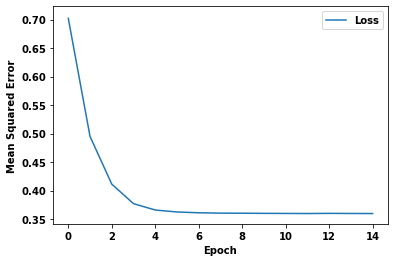


 Evaluate the linear regression model against the test set:
3000/3000 [==============================] - 0s 157us/sample - loss: 0.3955 - mean_squared_error: 0.3955


[0.395509531100591, 0.3955095]

In [12]:
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

This gives us a baseline of around 0.395 against the test set. This is useful data for assessing our neural network.

--------------------------
### 4. Build Neural Network Model

Now we will move on to the main part of this project - creating and training a neural net using TensorFlow that we can then use to make predictions for house values.

##### 4.1 - Define Model Creation Function

The code below creates a function which we can run as often as required to create a neural network in TensorFlow. We are going to take advantage of the [Keras API](https://www.tensorflow.org/guide/keras/sequential_model) which comes bundled with TensorFlow - this makes building a neural netowrk about as simple as building a neural network can be.

The Sequential model effectively works by letting us define as many layers as we want, and then compiling them together to create a model which we can use.

In this example we first declare our model. The next step is to use [model.add](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to add our feature layer, which we created back in step 2.4.

After this we want to define the topography of the model, again using model.add. In this case we add two [Dense layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and specify how many units are in the layer and the [activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations) (in this case a [rectified linear unit](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu), one of the simpler possibilities), and a name string which is useful for debugging.

We could also add some [regularisation](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c) to penalise complexity (and act against overfitting) at this stage, however in my experiments these had a net negative effect on the evaluation of the model against the test set.

Next we add one final 'output' layer to our model, and finally we [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) the model and return it as the output of the function.

In [13]:
def create_model(my_learning_rate, my_feature_layer):
  """Create and compile a simple neural network model."""

  # Discard any pre-existing version of the model.
  model = None
    
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer.

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  name='Hidden1'))
  
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))
  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

##### 4.2 - Define Model Training Function

Now the function which defines our model is created, the next step is to define a function to train the model by 'feeding' it data.

Here we loop through the dataset, converting each column of our DataFrame into a NumPy array and adding them to the list called features. Then we [pop](https://www.programiz.com/python-programming/methods/list/pop) our chosen label (entered as an argument to the train_model function) out of the list, so we have the label and features as separate variables.

These then are fed into [model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) to learn the model. 

The remainder of the function tracks the course of the training so that we can visualise it and confirm that the model is learning over the course of the epochs.

In [14]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

##### 4.3 - Call the Functions - Build and Train a Deep Neural Net

The next step is to define our [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_optimization) (tuning these is the main trial-and-error art of building a good model). 

We specify our label, then call the functions with the appropriate arguments.

Once the model has been trained against the training set, the final piece of code in this block tests the model against the test set.

Train on 17000 samples
Epoch 1/140
17000/17000 [==============================] - 1s 81us/sample - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 2/140
17000/17000 [==============================] - 0s 8us/sample - loss: 0.3810 - mean_squared_error: 0.3810
Epoch 3/140
17000/17000 [==============================] - 0s 8us/sample - loss: 0.3449 - mean_squared_error: 0.3449
Epoch 4/140
17000/17000 [==============================] - 0s 8us/sample - loss: 0.3378 - mean_squared_error: 0.3378
Epoch 5/140
17000/17000 [==============================] - 0s 9us/sample - loss: 0.3349 - mean_squared_error: 0.3349
Epoch 6/140
17000/17000 [==============================] - 0s 8us/sample - loss: 0.3332 - mean_squared_error: 0.3332
Epoch 7/140
17000/17000 [==============================] - 0s 8us/sample - loss: 0.3320 - mean_squared_error: 0.3320
Epoch 8/140
17000/17000 [==============================] - 0s 8us/sample - loss: 0.3311 - mean_squared_error: 0.3311
Epoch 9/140
17000/17000 [===============

17000/17000 [==============================] - 0s 9us/sample - loss: 0.3127 - mean_squared_error: 0.3127
Epoch 139/140
17000/17000 [==============================] - 0s 10us/sample - loss: 0.3130 - mean_squared_error: 0.3130
Epoch 140/140
17000/17000 [==============================] - 0s 11us/sample - loss: 0.3130 - mean_squared_error: 0.3130s - loss: 0.3151 - mean_squared_error: 0.


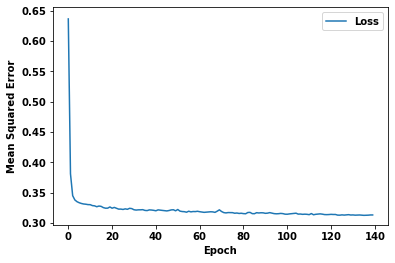


 Evaluate the new model against the test set:
3000/3000 [==============================] - 0s 149us/sample - loss: 0.3641 - mean_squared_error: 0.3641


[0.3641389807065328, 0.364139]

In [15]:
# The following variables are the hyperparameters.
learning_rate = 0.007
epochs = 140
batch_size = 1000

# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_df_norm, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

With the hyperparameters set like so, our deep neural network significantly outperforms our linear regression model. We can further tune the neural network via hyperparameters and adjusting the number of nodes and layers until we find a more optimal performance, if we have the time and the inclination to do so.

---------------------

### 5. Conclusion

##### 5.1 Conclusion

In this project, we successfully built a deep neural network using TensorFlow and Keras, and produced better quality predictions than were possible using a simpler Linear Regression algorithm.

Thanks to Tensorflow and Keras, the actual code required to build a neural network model is not significantly more complex than that required for a [linear regression](https://github.com/thecraigd/Linear_Regression_with_TensorFlow), but the computations happening under the hood are.

We also used some simple [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering) by implementing a feature cross using latitude and longitude. This same method can be utilised to cross multiple features and to create more complex new features, so this was very useful.

